[![pythonista](img/pythonista.png)](https://www.pythonista.io)

# ```Tipos de JOIN```.

JOIN es una operación fundamental en *Spark SQL* que permite combinar datos de múltiples fuentes basándose en una o más columnas comunes. Esta operación es esencial para el análisis de datos y la creación de relaciones entre conjuntos de datos diferentes.

In [ ]:
import pandas as pd
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("JOINS").getOrCreate()
ct = spark.sparkContext
%load_ext sparksql_magic

Los diversos usos de `JOIN` nos permite unir dos tablas a partir de una coindición que permita ligarlas ambas.

```
SELECT <cols> FROM <tabla izq> <TIPO> JOIN <tabla der> ON <condicion>
```

* https://spark.apache.org/docs/latest/sql-ref-syntax-qry-select-join.html

## Tablas ilustrativas.

Se definirán las tablas temporales ```zona_1``` y ```zona_2```. Cada una de ellas tiene las columnas:

* ```animal```
* ```poblacion```


In [ ]:
spark.createDataFrame(pd.DataFrame(
    {'animal':['zorro', 
               'conejo',
               'liebre', 
               'halcón'],
     'poblacion':[12,
                  436,
                  315,
                  7]
    })).createOrReplaceTempView('zona_1')

In [ ]:
%%sparksql
SELECT * 
FROM zona_1;

In [ ]:
spark.createDataFrame(pd.DataFrame(
    {'animal':['conejo',
               'jabalí',
               'venado',
               'jaguar',
               'águila',
               'halcón'],
     'poblacion':[2015,
                  450,
                  56,
                  2,
                  30,
                  25]
    })).createOrReplaceTempView('zona_2')

In [ ]:
%%sparksql
SELECT * 
FROM zona_2;

In [ ]:
spark.createDataFrame(pd.DataFrame(
    {'animal':['orangután', 
               'ocelote',
               'comadreja', 
               'perezoso'],
     'poblacion':[122,
                  46,
                  310,
                  0]
    })).createOrReplaceTempView('zona_3')

In [ ]:
%%sparksql
SELECT * 
FROM zona_3;

### ```JOIN```.

La claúsula `JOIN` se comporta de manera similar a un `INNER JOIN`.

```
SELECT <cols> 
FROM <tabla_izquerda>
JOIN <tabla_derecha>
   ON <columna izquierda> = <columna derecha>
```

In [ ]:
%%sparksql
SELECT
    izq.animal, 
    izq.poblacion
FROM zona_1 AS izq
JOIN zona_2 AS der
    ON izq.animal = der.animal;

In [ ]:
%%sparksql
SELECT 
    izq.animal, 
    izq.poblacion AS pob_izq, 
    der.poblacion AS pob_der
FROM zona_1 AS izq
JOIN zona_2 AS der
    ON izq.animal = der.animal;

### ```INNER JOIN```.

El `INNER JOIN` devuelve solo las filas que tienen coincidencias en ambas tablas. Es decir, las filas que cumplen con la condición de `JOIN`.

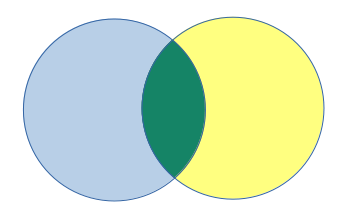

In [ ]:
%%sparksql
SELECT 
    izq.animal, 
    izq.poblacion 
FROM zona_1 AS izq
INNER JOIN zona_2 AS der
     ON izq.animal = der.animal;

In [ ]:
%%sparksql
SELECT 
    der.animal,
    der.poblacion 
FROM zona_1 AS izq
INNER JOIN zona_2 AS der
    ON izq.animal = der.animal;

### ```LEFT JOIN```.

El `LEFT JOIN` devuelve todas las filas de la tabla izquierda y las filas coincidentes de la tabla derecha. Si no hay coincidencias en la tabla derecha, se rellena con valores nulos.

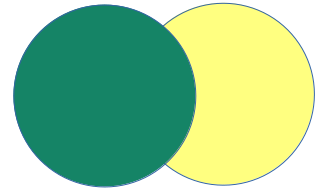

In [ ]:
%%sparksql
SELECT 
    izq.animal,
    izq.poblacion 
FROM zona_1 AS izq
LEFT JOIN zona_2 AS der
    ON izq.animal = der.animal;

In [ ]:
%%sparksql
SELECT 
    der.animal,
    der.poblacion 
FROM zona_1 AS izq
LEFT JOIN zona_2 AS der
    ON izq.animal = der.animal;

In [ ]:
%%sparksql
SELECT
    izq.animal,
    izq.poblacion AS pob_izq,
    der.poblacion AS pob_der 
FROM zona_1 AS izq
LEFT JOIN zona_2 AS der
    ON izq.animal = der.animal;

### ```RIGHT JOIN```.

El `RIGHT JOIN` es similar al `LEFT JOIN`, pero devuelve todas las filas de la tabla derecha y las filas coincidentes de la tabla izquierda.

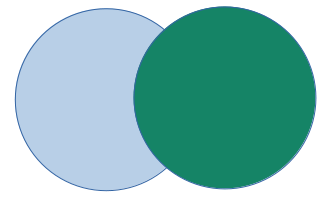

In [ ]:
%%sparksql
SELECT
    izq.animal,
    izq.poblacion 
FROM zona_1 AS izq
RIGHT JOIN zona_2 AS der
    ON izq.animal = der.animal;

In [ ]:
%%sparksql
SELECT
    der.animal,
    der.poblacion 
FROM zona_1 AS izq
RIGHT JOIN zona_2 AS der
    ON izq.animal = der.animal;

In [ ]:
%%sparksql
SELECT
    der.animal,
    izq.poblacion AS pob_izq, 
    der.poblacion AS pob_der 
FROM zona_1 AS izq
RIGHT JOIN zona_2 AS der
    ON izq.animal = der.animal;

### ```FULL OUTER JOIN```.

El `FULL OUTER JOIN` devuelve todas las filas cuando hay una coincidencia en una de las tablas. Si no hay coincidencias, se rellena con valores nulos en ambas tablas.

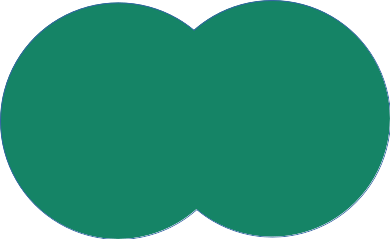

In [ ]:
%%sparksql
SELECT
    izq.animal,
    izq.poblacion 
FROM zona_1 AS izq
FULL OUTER JOIN zona_2 AS der
    ON izq.animal = der.animal;

In [ ]:
%%sparksql
SELECT 
    der.animal,
    der.poblacion 
FROM zona_1 AS izq
FULL OUTER JOIN zona_2 AS der
    ON izq.animal = der.animal;

In [ ]:
%%sparksql
SELECT
    CASE 
        WHEN izq.animal IS NULL THEN der.animal
            ELSE izq.animal
        END AS animal, 
    der.poblacion AS pob_der,
    izq.poblacion AS pob_izq
FROM zona_1 AS izq
FULL OUTER JOIN zona_2 AS der
     ON izq.animal = der.animal;

In [ ]:
%%sparksql
SELECT 
    der.animal,
    der.poblacion AS pob_der,
    izq.poblacion AS pob_izq
FROM zona_1 AS izq
FULL OUTER JOIN zona_3 AS der
    ON izq.animal = der.animal;

### ```LEFT SEMI JOIN```.

El `LEFT SEMI JOIN` es una operación de `JOIN` que devuelve todas las filas de la tabla izquierda (tabla principal) donde hay una coincidencia en la tabla derecha (tabla secundaria) en función de una condición especificada. Sin embargo, a diferencia de un `INNER JOIN` que devuelve todas las columnas de ambas tablas, el `LEFT SEMI JOIN` solo devuelve las columnas de la tabla izquierda. En otras palabras, se utiliza para filtrar la tabla principal en función de la existencia de registros coincidentes en la tabla secundaria.

Este `JOIN` fue diseñado para ahorrar memoria, ya que conserva unicamente los datos coicidentes y desecha el resto.

In [ ]:
%%sparksql
SELECT
    izq.animal,
    izq.poblacion 
FROM zona_1 AS izq
LEFT SEMI JOIN zona_2 AS der
    ON izq.animal = der.animal;

* La siguiente celda regresará un error.

In [ ]:
%%sparksql
SELECT
    izq.animal,
    der.poblacion 
FROM zona_1 AS izq
LEFT SEMI JOIN zona_2 AS der
    ON izq.animal = der.animal;

### ```LEFT ANTI JOIN```.

El `LEFT ANTI JOIN` es similar al `LEFT SEMII JOIN`, pero en lugar de devolver las filas de la tabla principal donde hay coincidencias en la tabla secundaria, devuelve las filas de la tabla principal donde NO hay coincidencias en la tabla secundaria. Es útil para identificar registros en la tabla principal que no tienen correspondencia en la tabla secundaria.



In [ ]:
%%sparksql
SELECT 
    izq.animal, 
    izq.poblacion 
FROM zona_1 AS izq
LEFT ANTI JOIN zona_2 AS der
    ON izq.animal = der.animal;

In [ ]:
%%sparksql
SELECT 
    izq.animal, 
    der.poblacion 
FROM zona_1 AS izq
LEFT ANTI JOIN zona_2 AS der
    ON izq.animal = der.animal;

### `CROSS JOIN`.

El `CROSS JOIN` es una operación de `JOIN` que combina cada fila de la tabla izquierda con cada fila de la tabla derecha, generando un conjunto de resultados que es el producto cartesiano de ambas tablas. Esto significa que cada fila de la tabla izquierda se combina con todas las filas de la tabla derecha, lo que puede resultar en un gran número de filas en el conjunto de resultados, especialmente si ambas tablas son grandes. El `CROSS JOIN` se utiliza con precaución, ya que puede generar resultados masivos y consumir muchos recursos.

In [ ]:
spark.sql('''
             SELECT
                 izq.animal AS animal_izq,
                 izq.poblacion AS pob_izq,
                 der.animal AS animal_der,
                 der.poblacion AS pob_der
            FROM zona_1 AS izq
            CROSS JOIN zona_2 AS der''').toPandas()

In [ ]:
%%sparksql
SELECT
    izq.animal AS animal_izq,
    izq.poblacion AS pob_izq,
    der.animal AS animal_der,
    der.poblacion AS pob_der
FROM zona_1 AS izq, zona_2 AS der;

<p style="text-align: center"><a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/80x15.png" /></a><br />Esta obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Licencia Creative Commons Atribución 4.0 Internacional</a>.</p>
<p style="text-align: center">&copy; José Luis Chiquete Valdivieso. 2023.</p>